### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [111]:
lista_modelos=['DTC','RND','BAG','ADA','GBCT','LOGREG','KNN']

In [5]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train_balanced.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test_balanced.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [101]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )


Aqui vamos a cargar los modelos para pasar los test

In [ ]:
load_files('ADA220905115548.pickle')

In [50]:
load_files('BAG220901161323.pickle','BAG')

In [ ]:
load_files('DTC220831182313.pickle','DTC')

In [40]:
load_files('GBCT220901161340.pickle','GBCT')

In [41]:
load_files('KNN220905121219.pickle','KNN')

In [47]:
load_files('LOGREG220901170800.pickle','LOGREG')

In [103]:
load_files('RND220901161312.pickle')


NameError: name 'model' is not defined

In [ ]:
LOGREG

In [6]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
ADA = pickle.load( open( 'ADA220905115548.pickle', "rb" ) )

In [7]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
BAG = pickle.load( open( 'BAG220901161323.pickle', "rb" ) )

In [8]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
DTC = pickle.load( open( 'DTC220831182313.pickle', "rb" ) )

In [9]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
GBCT = pickle.load( open( 'GBCT220901161340.pickle', "rb" ) )

In [10]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
KNN = pickle.load( open('KNN220905121219.pickle', "rb" ) )

In [11]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
LOGREG = pickle.load( open( 'LOGREG220901170800.pickle', "rb" ) )

In [12]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
RND = pickle.load( open( 'RND220901161312.pickle', "rb" ) )

### 2. CALCULATING ERROR IN EACH MODEL

In [13]:
def error_modelo(model):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='micro')
#    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='micro')
    recall_model=recall_score(y_test, y_pred,average='micro')
#    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
#    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
#    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)

def errores_modelos(lista_modelos:list): 
    '''
    Usamos una lista de los modelos entrenados para sacar sus metricas juntas y poder hacer asi una evaluación completa de todas
    '''            
    for model in lista_modelos:
        error_modelo(model) 


F1 0.5514084507042254
Precision 0.5514084507042254
Recall 0.5514084507042254
------------------------------


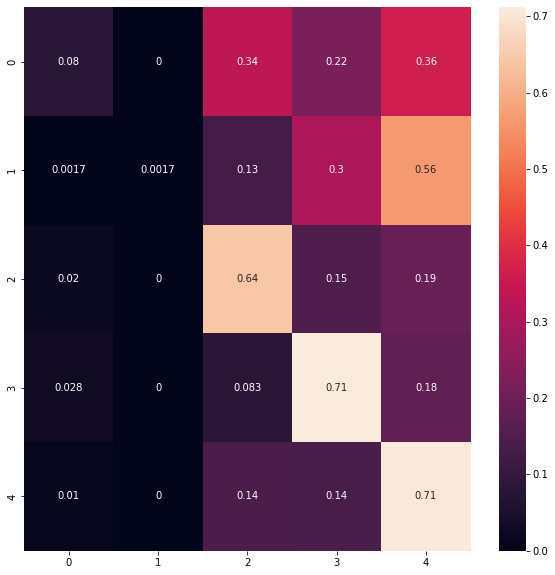

In [14]:
error_modelo(ADA)

F1 0.5735211267605633
Precision 0.5735211267605633
Recall 0.5735211267605633
------------------------------


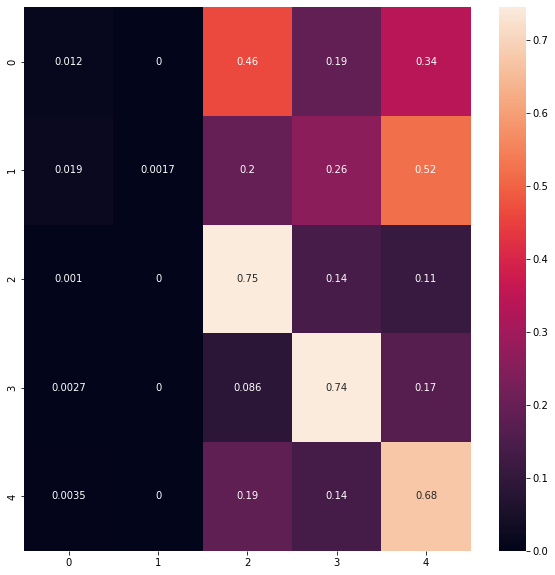

In [15]:
error_modelo(BAG)

F1 0.5646478873239437
Precision 0.5646478873239437
Recall 0.5646478873239437
------------------------------


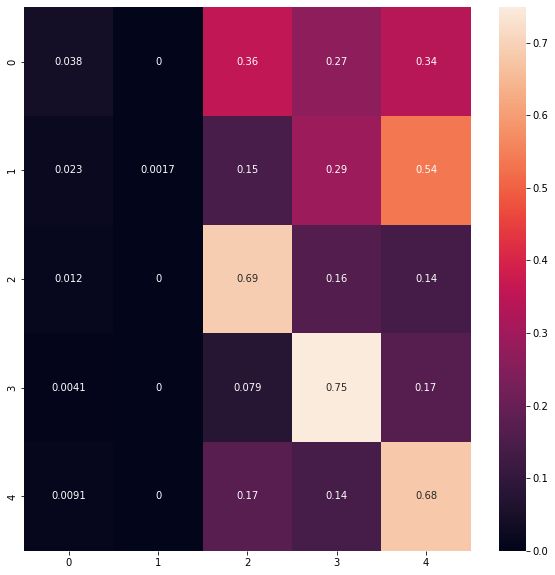

In [16]:
error_modelo(DTC)

F1 0.563943661971831
Precision 0.563943661971831
Recall 0.563943661971831
------------------------------


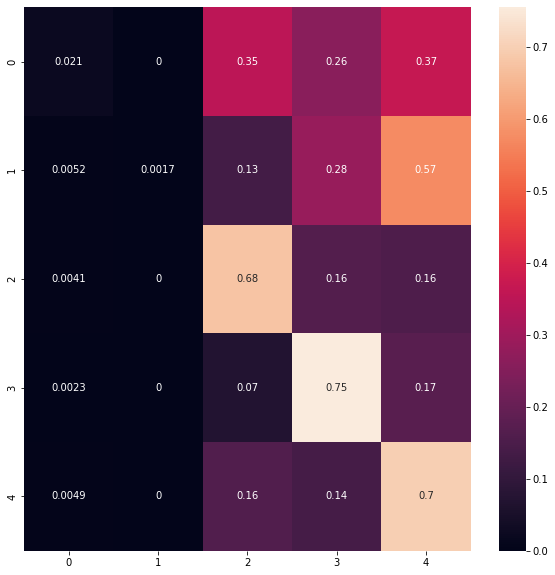

In [17]:
error_modelo(RND)

F1 0.5676056338028169
Precision 0.5676056338028169
Recall 0.5676056338028169
------------------------------


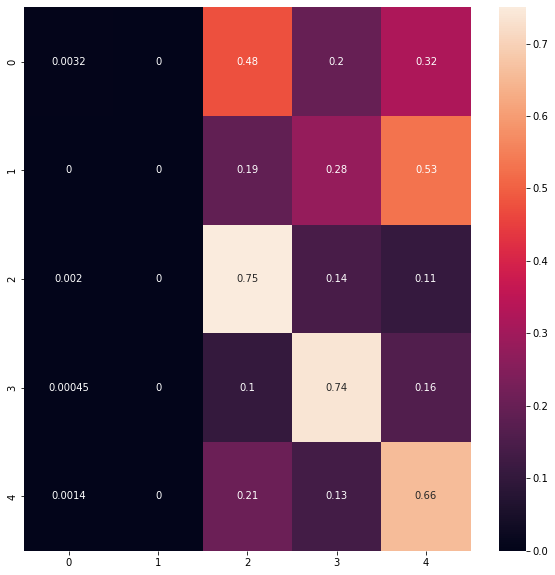

In [18]:
error_modelo(GBCT)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


F1 0.44014084507042256
Precision 0.44014084507042256
Recall 0.44014084507042256
------------------------------


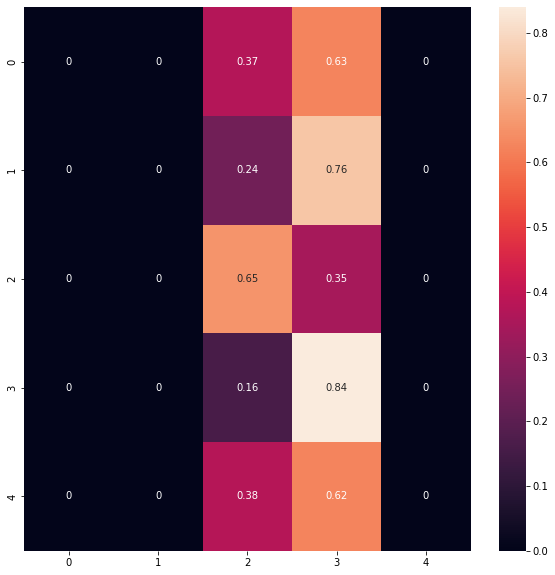

In [19]:
error_modelo(KNN)

F1 0.4911267605633803
Precision 0.4911267605633803
Recall 0.4911267605633803
------------------------------


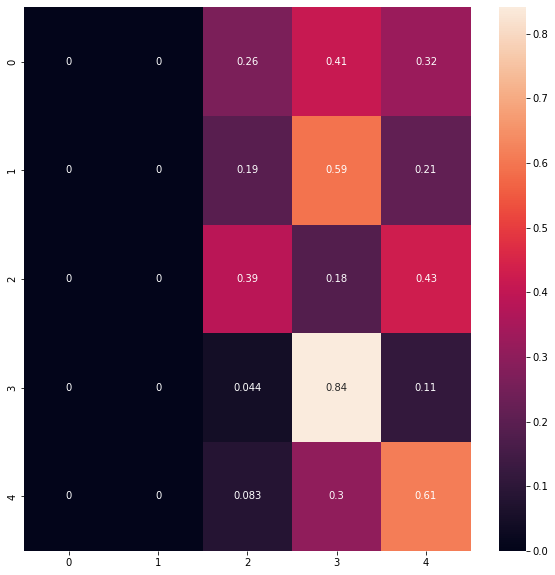

In [20]:
error_modelo(LOGREG)

Viendo estos datos desechamos los modelos de *REGRESION LOGÍSTICA* y de *K NEAREST NEIGHBORS*, ya que sus métricas están alejadas del resto.

### 3. LOOKING FOR THE BEST MODEL

In [125]:
pipe = Pipeline(steps=[
    ('classifier', RandomForestClassifier())                #Aqui da igual que clasificador los que se utilizan son los que vienen después, pero hay que poner uno
])

ada_params = {
    'classifier': [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))],               # Clasificador  1
    'classifier__n_estimator': np.arange(0,200,50),
    'classifier__learning_rate': np.arange(0.05,0.55,0.1),
    'classifier__algorithm': ['SAMME','SAMME.R']   
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],               # Clasificador  2
    'classifier__max_leaf_nodes': np.arange(0,50,5),
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__max_features': np.arange(5,30,5),
    'classifier__min_samples_leaf': np.arange(0.1,0.25,0.5),
    'classifier__bootstrap': [True,False],
    'classifier__warm_start': [True,False],
    'classifier__min_samples_split': np.arange(5,30,5)
}

DTC_params = {
    'classifier': [DecisionTreeClassifier()],                           # Clasificador  3
    'classifier__max_leaf_nodes': np.arange(0,50,5),
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__max_features': np.arange(5,30,5),
    'classifier__min_samples_leaf': np.arange(0.1,0.25,0.5),
    'classifier__min_samples_split': np.arange(5,30,5)
}

bag_params = {
    'classifier': [BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))],                           # Clasificador  3
    'classifier__bootstrap': [True,False],
    'classifier__warm_start': [True,False],
    'classifier__max_features': np.arange(2,5,1),
    'classifier__max_samples': np.arange(0,200,50),
    'classifier__n_estimators': np.arange(0,200,50)
}

GB_params = {
    'classifier': [GradientBoostingClassifier()],                           # Clasificador  3
    'classifier__criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__warm_start': [True, False],
    'classifier__max_features': np.arange(2,5,1),
    'classifier__learning_rate': np.arange(0.05,0.55,0.1),
    'classifier__min_samples_split': np.arange(5,30,5),
    'classifier__n_estimators': np.arange(0,200,50)
}

search_space = [
    ada_params,
    random_forest_params,
    DTC_params,
    bag_params,
    GB_params
]



In [ ]:
my_model = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10,
                  scoring='f1_samples')

In [ ]:
my_model.fit(X_train, y_train)
print(my_model.best_estimator_)
print(my_model.best_score_)
print(my_model.best_params_)